In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

---
>> **HOMEWORK**
>>
>> http://insideairbnb.com/get-the-data.html
>>
>> Download unique city
>> 1. Get top 10 landlords (most owned places, biggest salary when all places occupied)
>> 2. How the prices change if we go for a week or month (listings)
>> 3. How the apartment price depends on the evaluation of the location? What about cleanliness or other type of evaluations?
>> 4. Find superhosts. What part of all the landlords are superhosts.
>> 5. Longest comment (reviews_details)
>> 6. Most commented apartment
>> 7. From comment dates (reviews) report when there are most tourists in the city (plot comments vs dates)
>> 8.
>> 9.
>> 10.
>>
---


In [2]:
listings = pd.read_csv("~/Documents/bioa/data/Athens/listings.csv", index_col="id")
listings_details = pd.read_csv(
    "~/Documents/bioa/data/Athens/listings_details.csv",
    index_col="id",
    low_memory=False,
)
calendar = pd.read_csv(
    "~/Documents/bioa/data/Athens/calendar.csv",
    parse_dates=["date"],
    index_col=["listing_id"],
)
reviews = pd.read_csv(
    "~/Documents/bioa/data/Athens/reviews.csv",
    parse_dates=["date"],
    index_col=["listing_id"],
)
reviews_details = pd.read_csv(
    "~/Documents/bioa/data/Athens/reviews_details.csv",
    parse_dates=["date"],
    index_col=["listing_id"],
)

/home/aleks/.local/lib/python3.7/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
#  to display all the data
pd.set_option("display.max_column", 500)
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_seq_items", 500)
pd.set_option("display.max_colwidth", 500)
pd.set_option("expand_frame_repr", True)

In [4]:
target_columns = [
    "property_type",
    "accommodates",
    "first_review",
    "review_scores_value",
    "review_scores_cleanliness",
    "review_scores_location",
    "review_scores_accuracy",
    "review_scores_communication",
    "review_scores_checkin",
    "review_scores_rating",
    "maximum_nights",
    "listing_url",
    "host_is_superhost",
    "host_about",
    "host_response_time",
    "host_response_rate",
    "street",
    "weekly_price",
    "monthly_price",
    "market",
]
listings = pd.merge(listings, listings_details[target_columns], on="id", how="left")
listings = listings.drop(columns=["neighbourhood_group"])
listings["host_response_rate"] = pd.to_numeric(
    listings["host_response_rate"].str.strip("%")
)

>> 1. Get top 10 landlords (most owned places, biggest salary when all places occupied)

 - most owned

In [5]:
top10Id = (
    listings.groupby(["host_id"])["host_name"]
    .count()
    .reset_index(name="count")
    .sort_values(by="count", ascending=False)
    .head(10)
)
print(top10Id)

        host_id  count
2529   77457889    127
81       748818     86
1282   29927830     86
4399  182755179     81
3572  135482892     80
147     1621474     75
132     1418201     65
3141  112527018     58
171     2089542     49
206     2718115     46


In [6]:
for t_id in top10Id["host_id"].to_numpy():
    print(listings.loc[listings["host_id"] == t_id].iloc[1, 2])

Παναγιώτης
George
Homm ®
Bookiko
Home
Mint Team
Dean
Toni
Tia & Mike
Alex & Maria | Preffered |


In [7]:
#  - cumulative price
top100Id = (
    listings.groupby(["host_id"])["host_name"]
    .count()
    .reset_index(name="count")
    .sort_values(by="count", ascending=False)
    .head(100)
)

In [8]:
cummulative_sum = (
    listings[listings["host_id"].isin(top100Id["host_id"])]
    .groupby("host_id")["price"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

In [9]:
for c_id, c_sum in zip(cummulative_sum.index.to_numpy(), cummulative_sum.to_numpy()):
    print(f'{listings.loc[listings["host_id"] == c_id].iloc[1, 2]} earns {c_sum}')

Bookiko earns 8708
Dean earns 8026
Jj earns 7867
George earns 7390
Home earns 6223
Anna earns 5950
Homm ® earns 5743
Mint Team earns 4586
Toni earns 4206
Παναγιώτης earns 3882


>> 2. How the prices change if we go for a week or month (listings)

In [10]:
listings.columns

Index(['name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'property_type',
       'accommodates', 'first_review', 'review_scores_value',
       'review_scores_cleanliness', 'review_scores_location',
       'review_scores_accuracy', 'review_scores_communication',
       'review_scores_checkin', 'review_scores_rating', 'maximum_nights',
       'listing_url', 'host_is_superhost', 'host_about', 'host_response_time',
       'host_response_rate', 'street', 'weekly_price', 'monthly_price',
       'market'],
      dtype='object')

In [11]:
listings.price.head()

id
10595    176
10988    118
10990     85
10993     76
10995     85
Name: price, dtype: int64

In [12]:
listings.weekly_price.head()

id
10595    $700.00
10988    $560.00
10990    $420.00
10993    $350.00
10995    $420.00
Name: weekly_price, dtype: object

In [13]:
listings["weekly_price"] = pd.to_numeric(
    listings["weekly_price"].str.strip("$").str.replace(",", "")
)
listings.weekly_price.head()

id
10595    700.0
10988    560.0
10990    420.0
10993    350.0
10995    420.0
Name: weekly_price, dtype: float64

In [14]:
listings.monthly_price.head()

id
10595    $2,800.00
10988    $2,240.00
10990    $1,680.00
10993    $1,400.00
10995    $1,680.00
Name: monthly_price, dtype: object

In [15]:
listings["monthly_price"] = pd.to_numeric(
    listings["monthly_price"].str.strip("$").str.replace(",", "")
)
listings.monthly_price.head()

id
10595    2800.0
10988    2240.0
10990    1680.0
10993    1400.0
10995    1680.0
Name: monthly_price, dtype: float64

lets convert monthly and weekly prices per day

In [16]:
(listings.monthly_price / 30).dropna().mean()

43.95418692598595

In [17]:
(listings.weekly_price / 7).dropna().mean()

57.18768768768762

In [18]:
listings.price.mean()

65.32569928487372

>> 3. How the apartment price depends on the evaluation of the location? What about cleanliness or other type of evaluations?

Text(0, 0.5, 'price')

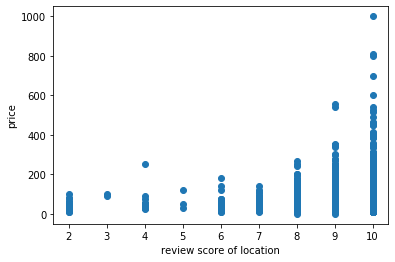

In [19]:
listings.columns
plt.scatter(listings.review_scores_location, listings.price)
plt.xlabel("review score of location")
plt.ylabel("price")

In [20]:
listings.groupby("review_scores_location").price.mean()

review_scores_location
2.0     43.750000
3.0     95.000000
4.0     61.000000
5.0     67.000000
6.0     49.071429
7.0     45.394737
8.0     46.995604
9.0     47.661707
10.0    62.277737
Name: price, dtype: float64

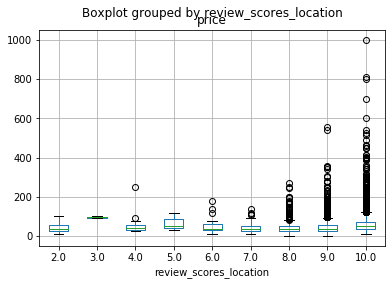

In [21]:
listings.boxplot(column="price", by="review_scores_location")

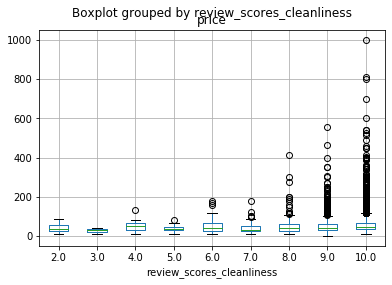

In [22]:
listings.boxplot(column="price", by="review_scores_cleanliness")

>> 4. Find superhosts. What part of all the landlords are superhosts.

In [23]:
listings.columns

Index(['name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'property_type',
       'accommodates', 'first_review', 'review_scores_value',
       'review_scores_cleanliness', 'review_scores_location',
       'review_scores_accuracy', 'review_scores_communication',
       'review_scores_checkin', 'review_scores_rating', 'maximum_nights',
       'listing_url', 'host_is_superhost', 'host_about', 'host_response_time',
       'host_response_rate', 'street', 'weekly_price', 'monthly_price',
       'market'],
      dtype='object')

In [24]:
listings.host_is_superhost.isnull().sum()

0

In [25]:
total = listings.host_is_superhost.shape[0]
total

11047

In [28]:
superhosts = listings.host_is_superhost.str.count(r"t").sum()
superhosts

4098

In [29]:
print(f" Super hosts are {superhosts/total*100:.3}% of all the landlords")

 Super hosts are 37.1% of all the landlords


>> 5. Longest comment (reviews_details)

In [30]:
reviews_details.comments.iloc[0]

'The apartment was wonderful, fully equiped, beautiful decor, very comfortable. VERRY CLEAN!  Would stay there again or possibly another of host properties.  Close to Metro, markets, grocery store all conveniences.'

In [31]:
len(reviews_details.comments.iloc[0])

213

 listing id with longest comment

In [32]:
reviews_details.comments.str.len().sort_values(ascending=False).head()

listing_id
26716805    5553.0
15754084    5429.0
30580730    5124.0
24556899    4998.0
33215030    4835.0
Name: comments, dtype: float64

In [33]:
reviews_details.loc[26716805]

,id,date,reviewer_id,reviewer_name,comments
listing_id,,,,,
26716805,317993829,2018-09-03,9016881,Natan,"I stayed at Maria's place for a week and had a lovely time. Spacious apartment with a nice garden/balcony, as well as plenty of sunlight. This apartment is just a short walk to the National Archaeological Museum which is a must-see and walkable to the Acropolis as well. 5/5 would recommend."
26716805,324858434,2018-09-18,42655565,Markus,Der Empfang und die Kommunikation mit Maria und Dionysia war vorbildlich und supernett. Vor Ort wurde alles nötige erklärt und es gibt eine Infomappe mit Restauranttips und dergleichen. Die Wohnung übertraf meine Erwartungen in jeder Hinsicht und war sowohl von der Ausstattung (so ist die Küchenausstattung beispielsweise umfangreicher als meine eigene und jeder Gast der selber kochen will wird es zu schätzen wissen) als auch der Lage optimal (Exarchia). Der riesige Balkon mit mehreren Sitzge...
26716805,326306576,2018-09-22,1387826,Nick,Very well appointed apartment in a very good location
26716805,331269686,2018-10-02,116735952,Christian,We had a pleasant stay in Athens. The apartment was very comfortable and quit big. Thank you very much for your great Tipps. Christian and Marisa
26716805,340188442,2018-10-23,5395149,Zara,"I have stayed in a few different types of AirBnB over the years (most of which I have rated five stars), and I must say that Maria's and Dionysia's flat is so far THE BEST! I have lived here now for about a month and have one week to go, and frakly, I don't want to leave! ...But I have already promised to myself that as soon as I'm able to return to Athens, I will try and book Maria's flat. Although the flat is in high demand, so be sure to book on time! ;-) Everything in M&D's flat is prett..."
26716805,422502125,2019-03-11,22841698,Mehdi,"Nice place, nice location, nice host, what else?"
26716805,429829198,2019-03-29,22095560,Ignacio,"One of my best stays with airbnb. The appartment is huge, kitchen is awesome, overall a great experience. You can walk to the center of the town in less than 20 minutes and shops/supermarkets are aroud the corner. Thanks again!"
26716805,442385209,2019-04-23,12510495,Axel,"We loved our stay at the apartment. Situated in a calm neigborhood. Lovely, large balcony. Thank you!"
26716805,459193084,2019-05-27,25332313,Claudia,"We loved Dionysia’s apartment and felt very comfortable and at home. Thank you very much for the bottle of wine and the chocolate easter eggs! The flat is as described in the listing: bright, airy, spacious and comfortable, situated in a good location and equipped with everything we needed for a longer stay. The balcony was great with shade provided and looking out on a quiet neighbourhood street. Communication with Dionysia was very good—she was always very helpful and responded very quickl..."


In [34]:
for review in reviews_details.loc[26716805].comments:
    print(len(review))

291
847
53
145
5553
48
227
101
634
423


 longest comment id

In [35]:
reviews_details.loc[26716805].set_index("id")["comments"].str.len()

id
317993829     291
324858434     847
326306576      53
331269686     145
340188442    5553
422502125      48
429829198     227
442385209     101
459193084     634
483120969     423
Name: comments, dtype: int64

>> 6. Most commented apartment

In [36]:
reviews_details.groupby("listing_id")["id"].count().sort_values(ascending=False).head(1)

listing_id
1177492    654
Name: id, dtype: int64

In [37]:
reviews_details.loc[1177492]

,id,date,reviewer_id,reviewer_name,comments
listing_id,,,,,
1177492,4988542,2013-06-05,1958978,Yiannis,Great location for seeing the main tourist sites and it really is within walking distance to the Acropolis so a great place to stay as a base for a few days to see Athens! Tucked away in a little narrow street so we slept well in a nice comfortable bed as it's very quiet although it's so central. Great hosts - Our arrival was delayed but despite the late hour Rio made us feel really at home and Maria had cooked some delicious food which was very welcome.
1177492,5070586,2013-06-10,632436,Amy,"My Stay at Rio's studio was just perfect. He was extremely kind and helpful. Communication was clear and easy. The studio is great. Really comfortable and clean, with a great shower and quiet sleeping loft perfect for jet lag recovery. Rio helped me get a sense of the neighborhood and suggested some things to do. The walk to Plaka and the center is very short, safe and pleasant. The neighborhood is old and interesting, with beautiful architecture and a nice community feeling. I highly..."
1177492,5109696,2013-06-12,959980,Thora,"We stayed two days and didn't feel like leaving!\r\n\r\nHaving a nice, quiet and spacious place made the visit to Athens, which is decently hectic, plainly enjoyable.\r\n\r\nIts a lovely studio in a really good location - close to the center but quiet - and rio and maria are nice people who made us feel very welcome indeed!"
1177492,5122189,2013-06-13,6758620,Sylvain,"Great experience ! This studio rent by Rio is a perfect option and will become my 'address' on my next stays in Athens ... Convenient location, it's more a little pretty house than a studio ,well equiped and decorated !!! that's for the 'place', about the 'people' Rio and his family are very,very kind and helpful !!! I thank them very much for their warm welcome !!!... ;-)"
1177492,5202108,2013-06-17,6593612,Christoph,We stayed only one night in rio `s studio. The apartment was clean and we were warmly welcomed. the area is quiet and the house is located near many attractions in the city. Rio and Maria are excellent hosts and invited us for a great ice coffee. The public transportation are close and the studio is easy to find. All in all a great place to stay longer.
1177492,5235396,2013-06-19,5652245,Georgios,"I stayed in Rio's apt for 2 nights and it was really awesome! The apt is really cosy, and neat, ideal for solo travellers or a couple.\r\nLocated in the center of Athens, but in a beautiful and quiet neighborhood, just 3-5 mins walking from the main metro, bus, trolley and tram lines, which connect you to the whole city. Of course, it's also walking distance from the very centre of the city itself (5-6 mins to Acropolis Museum, or a 15 mins walk to Syntagma Square).\r\nRio and Maria were ama..."
1177492,5372222,2013-06-26,1711327,Alesya,"Rio and his wife made my stay in Athens very welcomed. Rio politely met me at the bus stop after my arrival and his wife gently took me back at the end of my journey. \r\nThe street, where the house is situated, is very quite and green. \r\nThe house was clean and bright. It is a lovely cool escape in hot days. I was very pleased to stay in this beautiful home!\r\n\r\nSome words in Russian: Как только я написала Рио о своем приезде, он вежливо предложил встретить меня на главной площади посл..."
...,...,...,...,...,...
1177492,473170204,2019-06-21,19950777,Fatima Zahra,Beautiful cozy and clean! Highly recommend it!


>> 7. From comment dates (reviews) report when there are most tourists in the city (plot comments vs dates)

In [38]:
reviews.head()
reviews["count"] = 1

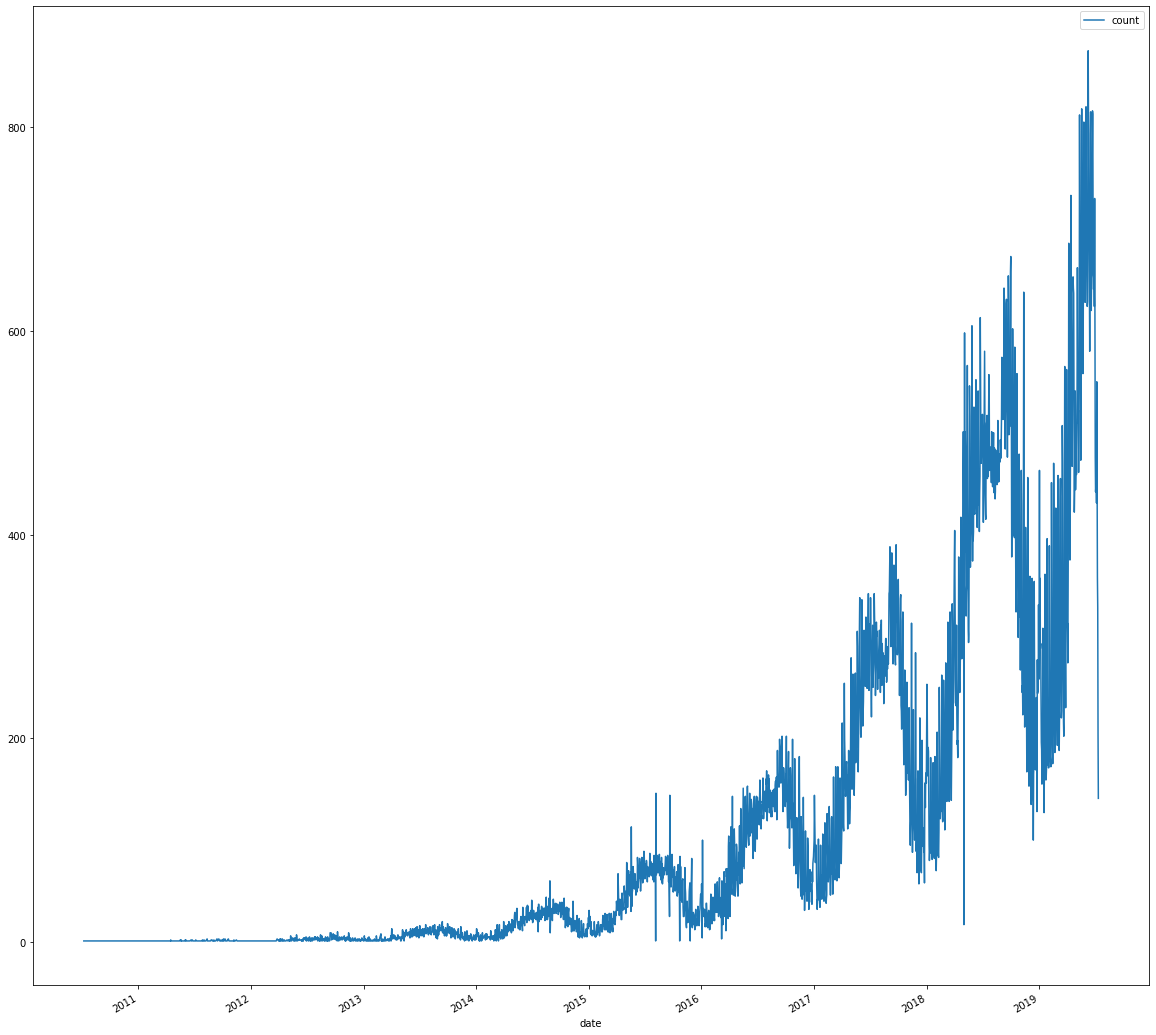

In [48]:
reviews.groupby("date").sum().plot(figsize=(20,20));
